In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final project PTTK/VIB Historical Data.csv')
df.head()
df['Date'] = pd.to_datetime(df['Date'])
train_dates= pd.to_datetime(df['Date'])
df.head()
len(df)

1488

### VIB

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1488 non-null   datetime64[ns]
 1   Price   1488 non-null   int64         
 2   Open    1488 non-null   int64         
 3   High    1488 non-null   int64         
 4   Low     1488 non-null   int64         
 5   Vol.    1488 non-null   float64       
 6   Change  1488 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 81.5 KB


In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change
0,2017-01-10,8419,8599,8599,8329,484450.0,0.0108
1,2017-01-11,8329,8419,8419,8239,357630.0,-0.0107
2,2017-01-12,7564,8104,8104,7564,107940.0,-0.0918
3,2017-01-13,6843,7339,7339,6798,145860.0,-0.0953
4,2017-01-16,6888,6933,6933,6708,277200.0,0.0066


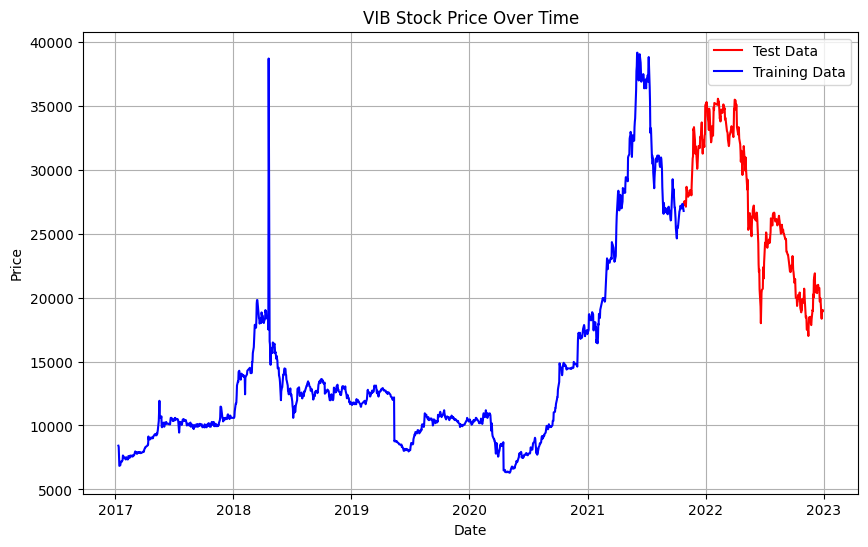

In [ ]:
# Split data into training (80%) and test (20%)
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

# Plotting both training and test data on the same chart
plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Price'], linestyle='-',  color='r', label='Test Data')
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', color='b', label='Training Data')

plt.title('VIB Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

# Drop the 'Date' column from both X_train and X_test
X_train = train_data.drop(['Price', 'Date'], axis=1)
y_train = train_data['Price']

X_test = test_data.drop(['Price', 'Date'], axis=1)
y_test = test_data['Price']

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
n_days_for_prediction= 30
cols = list(df)[1:6]
predict_period_dates = pd.date_range(list(train_dates)[-1], periods=n_days_for_prediction).tolist()
print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])
df_for_training = df[cols].astype(float)

[Timestamp('2022-12-30 00:00:00', freq='D'), Timestamp('2022-12-31 00:00:00', freq='D'), Timestamp('2023-01-01 00:00:00', freq='D'), Timestamp('2023-01-02 00:00:00', freq='D'), Timestamp('2023-01-03 00:00:00', freq='D'), Timestamp('2023-01-04 00:00:00', freq='D'), Timestamp('2023-01-05 00:00:00', freq='D'), Timestamp('2023-01-06 00:00:00', freq='D'), Timestamp('2023-01-07 00:00:00', freq='D'), Timestamp('2023-01-08 00:00:00', freq='D'), Timestamp('2023-01-09 00:00:00', freq='D'), Timestamp('2023-01-10 00:00:00', freq='D'), Timestamp('2023-01-11 00:00:00', freq='D'), Timestamp('2023-01-12 00:00:00', freq='D'), Timestamp('2023-01-13 00:00:00', freq='D'), Timestamp('2023-01-14 00:00:00', freq='D'), Timestamp('2023-01-15 00:00:00', freq='D'), Timestamp('2023-01-16 00:00:00', freq='D'), Timestamp('2023-01-17 00:00:00', freq='D'), Timestamp('2023-01-18 00:00:00', freq='D'), Timestamp('2023-01-19 00:00:00', freq='D'), Timestamp('2023-01-20 00:00:00', freq='D'), Timestamp('2023-01-21 00:00:00'

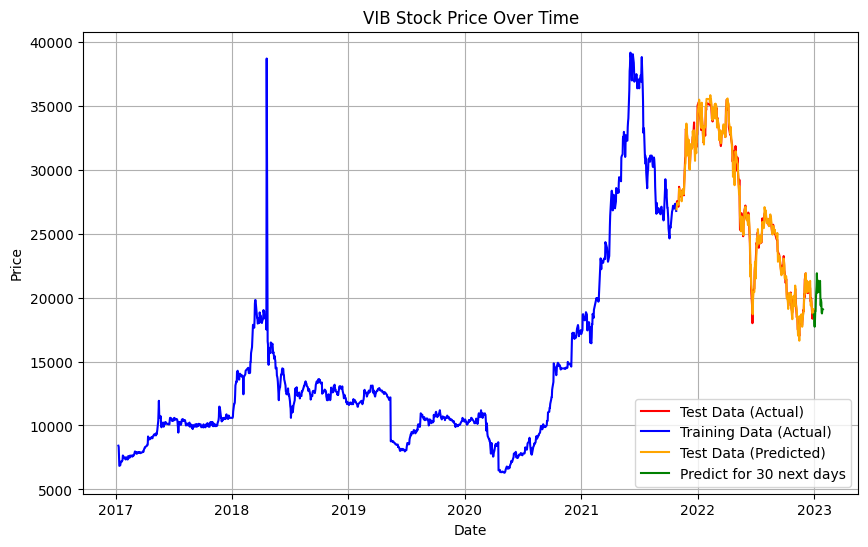

In [ ]:

# Visualize time series of actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['Price'], linestyle='-', color='r', label='Test Data (Actual)')
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', color='b', label='Training Data (Actual)')
plt.plot(test_data['Date'], y_pred, linestyle='-', color='orange', label='Test Data (Predicted)')
plt.plot(predict_period_dates, prediction1, linestyle='-', color='g', label='Predict for 30 next days')
plt.title('VIB Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the metrics
print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 1.18%
MAE: 307.29
RMSE: 402.36


### SVN


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final project PTTK/SVN Historical Data.csv')
df.head()
df['Date'] = pd.to_datetime(df['Date'])
df.head()
df = df[::-1]
train_dates= pd.to_datetime(df['Date'])
df = df.dropna()
df.head()


,Date,Price,Open,High,Low,Vol.,Change
1360,2016-01-04,4500,4500,4500,4400,3000.0,0.0000
1359,2016-01-05,4500,4500,4600,4300,17200.0,0.0000
1358,2016-01-06,4700,4400,4700,4300,24400.0,0.0444
1357,2016-01-07,4400,4600,4600,4300,18300.0,-0.0638
1356,2016-01-08,4800,4500,4800,4300,51000.0,0.0909


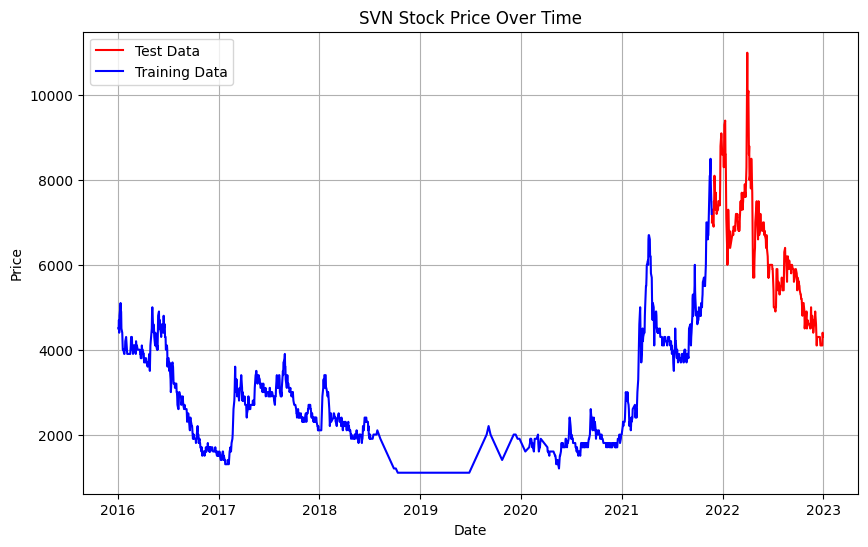

In [ ]:
# Split data into training (80%) and test (20%)
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

# Plotting both training and test data on the same chart
plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Price'], linestyle='-',  color='r', label='Test Data')
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', color='b', label='Training Data')

plt.title('SVN Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

# Drop the 'Date' column from both X_train and X_test
X_train = train_data.drop(['Price', 'Date'], axis=1)
y_train = train_data['Price']

X_test = test_data.drop(['Price', 'Date'], axis=1)
y_test = test_data['Price']

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
#Predict 30 next days
n_days_for_prediction= 30
cols = list(df)[1:6]
predict_period_dates = pd.date_range(list(train_dates)[-1], periods=n_days_for_prediction).tolist()
print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])
df_for_training = df[cols].astype(float)

[Timestamp('2022-12-30 00:00:00', freq='D'), Timestamp('2022-12-31 00:00:00', freq='D'), Timestamp('2023-01-01 00:00:00', freq='D'), Timestamp('2023-01-02 00:00:00', freq='D'), Timestamp('2023-01-03 00:00:00', freq='D'), Timestamp('2023-01-04 00:00:00', freq='D'), Timestamp('2023-01-05 00:00:00', freq='D'), Timestamp('2023-01-06 00:00:00', freq='D'), Timestamp('2023-01-07 00:00:00', freq='D'), Timestamp('2023-01-08 00:00:00', freq='D'), Timestamp('2023-01-09 00:00:00', freq='D'), Timestamp('2023-01-10 00:00:00', freq='D'), Timestamp('2023-01-11 00:00:00', freq='D'), Timestamp('2023-01-12 00:00:00', freq='D'), Timestamp('2023-01-13 00:00:00', freq='D'), Timestamp('2023-01-14 00:00:00', freq='D'), Timestamp('2023-01-15 00:00:00', freq='D'), Timestamp('2023-01-16 00:00:00', freq='D'), Timestamp('2023-01-17 00:00:00', freq='D'), Timestamp('2023-01-18 00:00:00', freq='D'), Timestamp('2023-01-19 00:00:00', freq='D'), Timestamp('2023-01-20 00:00:00', freq='D'), Timestamp('2023-01-21 00:00:00'

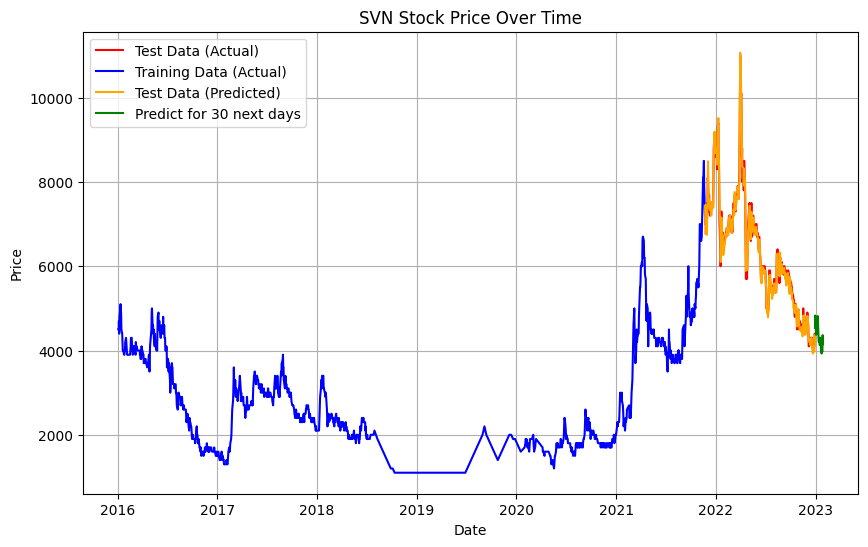

In [ ]:

# Visualize time series of actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['Price'], linestyle='-', color='r', label='Test Data (Actual)')
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', color='b', label='Training Data (Actual)')
plt.plot(test_data['Date'], y_pred, linestyle='-', color='orange', label='Test Data (Predicted)')
plt.plot(predict_period_dates, prediction1, linestyle='-', color='g', label='Predict for 30 next days')
plt.title('SVN Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the metrics
print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 1.74%
MAE: 108.13
RMSE: 144.68


### VNM


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final project PTTK/VNM ETF Stock Price History.csv')
df.head()
df['Date'] = pd.to_datetime(df['Date'])
df.head()
df = df[::-1]
train_dates= pd.to_datetime(df['Date'])
df = df.dropna()
df.head()


,Date,Price,Open,High,Low,Vol,Change
1785,2016-01-04,14970.0,14620.0,14970.0,14550.0,834450.0,0.0122
1784,2016-01-05,15000.0,14880.0,15040.0,14800.0,1130000.0,0.0020
1783,2016-01-06,14670.0,14920.0,14920.0,14670.0,604490.0,-0.0220
1782,2016-01-07,14340.0,14420.0,14430.0,14250.0,764620.0,-0.0225
1781,2016-01-08,13970.0,14340.0,14420.0,13940.0,471170.0,-0.0258


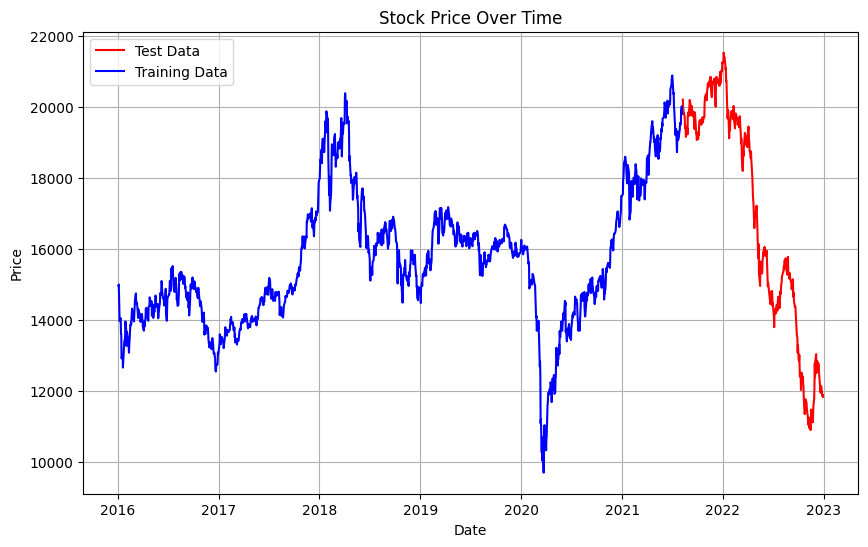

In [ ]:
# Split data into training (70%) and test (30%)
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

# Plotting both training and test data on the same chart
plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Price'], linestyle='-',  color='r', label='Test Data')
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', color='b', label='Training Data')

plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

# Drop the 'Date' column from both X_train and X_test
X_train = train_data.drop(['Price', 'Date'], axis=1)
y_train = train_data['Price']

X_test = test_data.drop(['Price', 'Date'], axis=1)
y_test = test_data['Price']

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
n_days_for_prediction= 30
cols = list(df)[1:6]
predict_period_dates = pd.date_range(list(train_dates)[-1], periods=n_days_for_prediction).tolist()
print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])
df_for_training = df[cols].astype(float)

[Timestamp('2022-12-30 00:00:00', freq='D'), Timestamp('2022-12-31 00:00:00', freq='D'), Timestamp('2023-01-01 00:00:00', freq='D'), Timestamp('2023-01-02 00:00:00', freq='D'), Timestamp('2023-01-03 00:00:00', freq='D'), Timestamp('2023-01-04 00:00:00', freq='D'), Timestamp('2023-01-05 00:00:00', freq='D'), Timestamp('2023-01-06 00:00:00', freq='D'), Timestamp('2023-01-07 00:00:00', freq='D'), Timestamp('2023-01-08 00:00:00', freq='D'), Timestamp('2023-01-09 00:00:00', freq='D'), Timestamp('2023-01-10 00:00:00', freq='D'), Timestamp('2023-01-11 00:00:00', freq='D'), Timestamp('2023-01-12 00:00:00', freq='D'), Timestamp('2023-01-13 00:00:00', freq='D'), Timestamp('2023-01-14 00:00:00', freq='D'), Timestamp('2023-01-15 00:00:00', freq='D'), Timestamp('2023-01-16 00:00:00', freq='D'), Timestamp('2023-01-17 00:00:00', freq='D'), Timestamp('2023-01-18 00:00:00', freq='D'), Timestamp('2023-01-19 00:00:00', freq='D'), Timestamp('2023-01-20 00:00:00', freq='D'), Timestamp('2023-01-21 00:00:00'

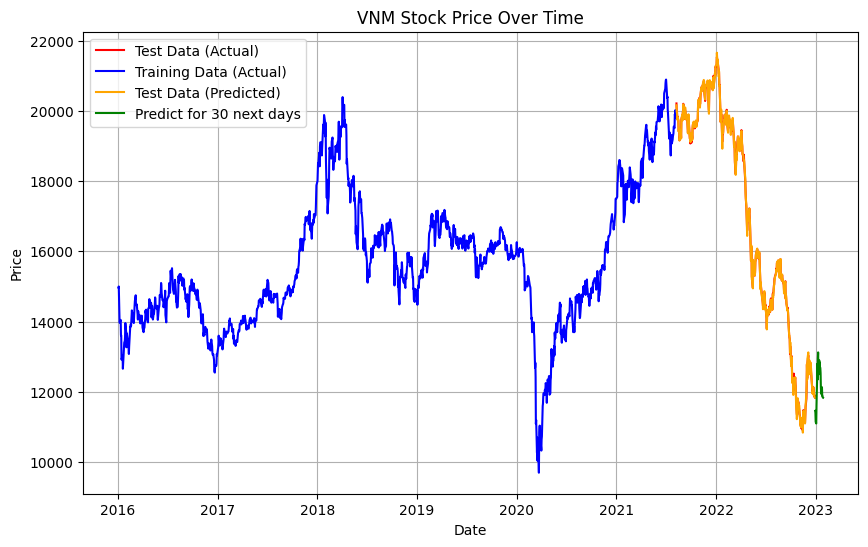

In [ ]:

# Visualize time series of actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['Price'], linestyle='-', color='r', label='Test Data (Actual)')
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', color='b', label='Training Data (Actual)')
plt.plot(test_data['Date'], y_pred, linestyle='-', color='orange', label='Test Data (Predicted)')
plt.plot(predict_period_dates, prediction1, linestyle='-', color='g', label='Predict for 30 next days')
plt.title('VNM Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the metrics
print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 0.24%
MAE: 38.74
RMSE: 52.44
